# Riddle of 100 prisoners' boxes

Original riddle: https://www.youtube.com/watch?v=iSNsgj1OCLA&t=0s&ab_channel=Veritasium 

### Riddle

Says there are 100 prisoner, numbered from 1 to 100:

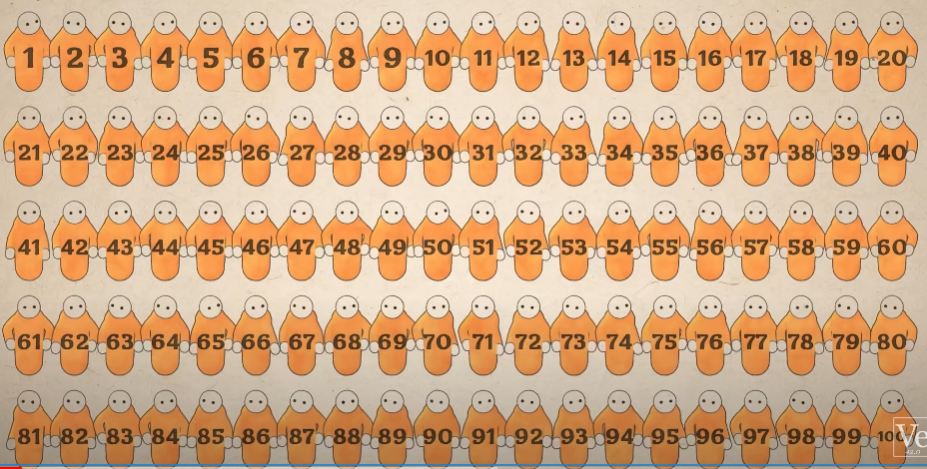

And there are slips of papers contain their number, from 1-100 are randomly placed in boxes, also labeled 1-100

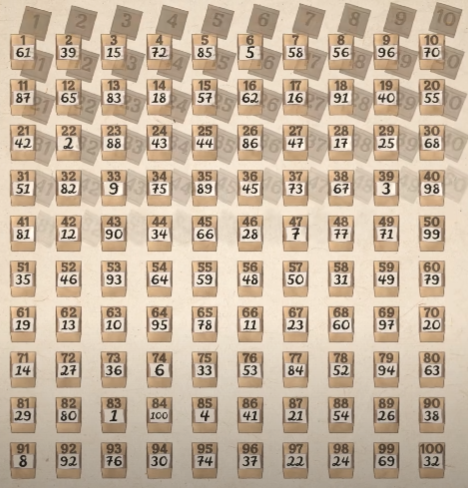


All the boxed are placed in a sealed room. Each of the prisoner are allowed in the room and open any 50 boxes, searching for their number.

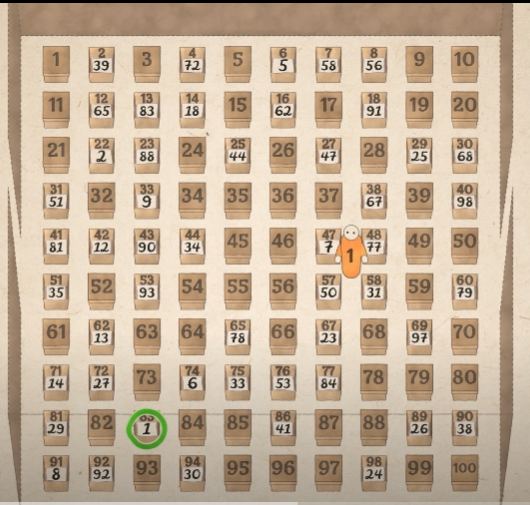

And afterwards, they must leave the room exactly as they found it and exit the room. The next prisoner enters. They can't communicate to each others after they already entered and exit the room.

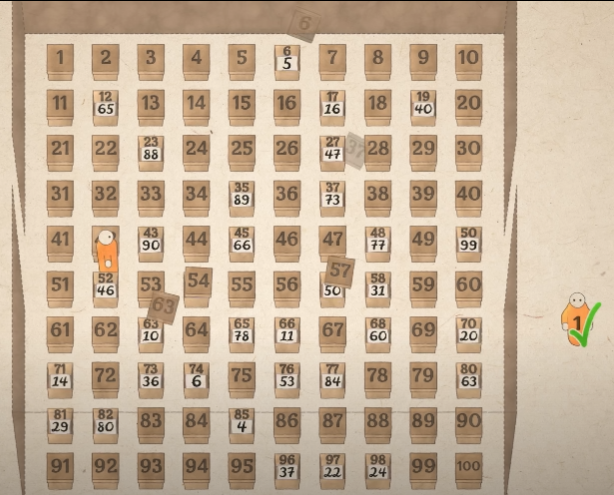

If all 100 prisoners can find their number, they will be free.

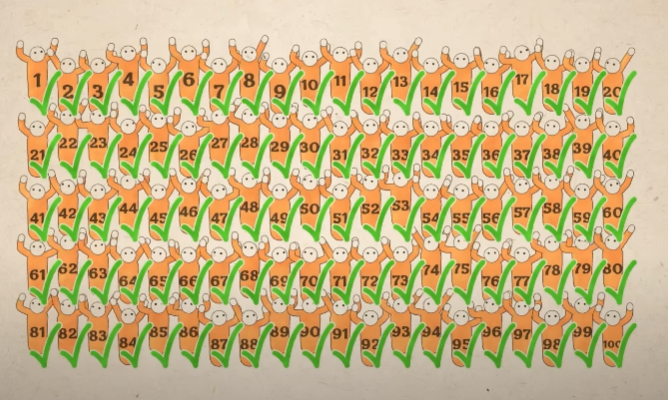

But if even one of them can't find their number, all of them will be executed.

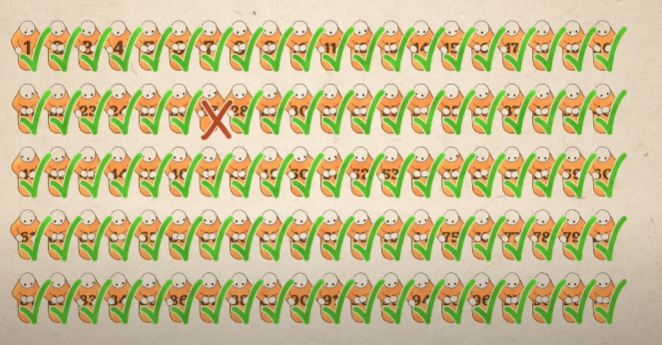

If all of them open the 50 boxes at random, there probability of surviving is: **0.5^100 = 7.9e-31**, pretty much non-existent. 

The prisoners are allowed to strategize **before and only before** they start to enter the room. Is there a strategy to increase their probability of success?

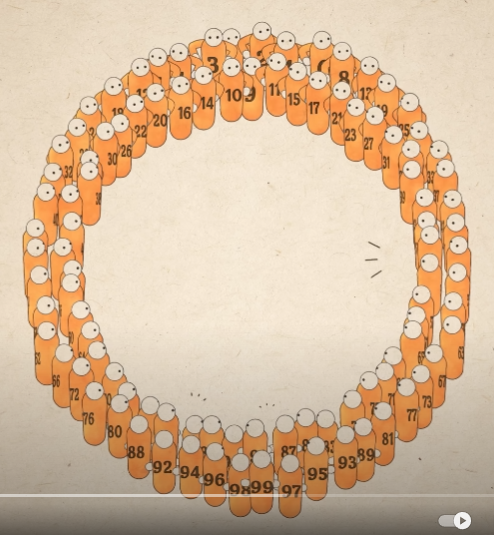



### Solution
The best strategy (as explained in the video) is as follow:

Each prisoner will first open the box of their number, then open the subsequent boxes with the number they found in the previous box. Like this:

For prisoner number 1:
>- 1st box: Open box 1 (their number): found number 32
>- 2nd box: Open box 32: found number 19
>- 3rd box: Open box 19, found number 83
>- ....
>- i-th box: Open box 55: found number 1.

This goes on until they find their number or run out of 50 attempts. 



**Explanation:**
- This way, the sequence they open the boxes will form a loop, with min length = 1 and max length = 100.
- For all the prisoners whose numbers are in a loop shorter than 51: they are guaranteed to find their number, following this methods. 
- From the 100 boxes: there will be a number of loops with various lengths. If there are no loop longer than 50, all 100 prisoners can find their boxes.

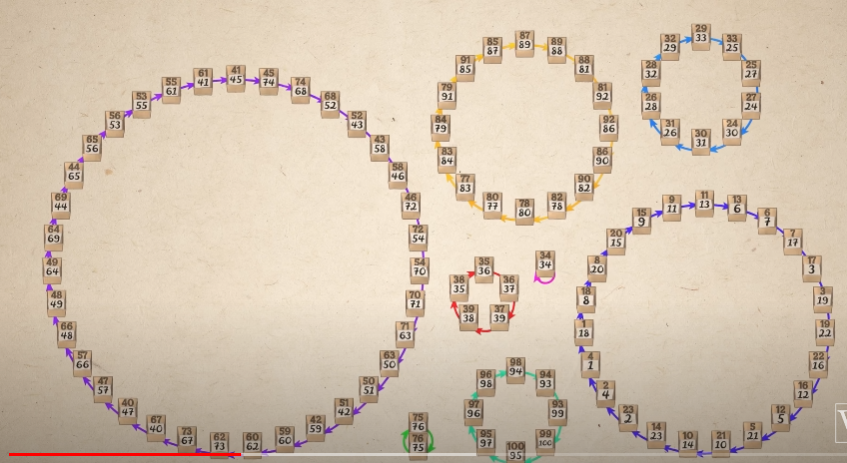


- The probability of existing a loop longer than 50 is about ~0.69, which mean the probability of survival (no loop longer than 50) **is ~0.31**, a lot better than choosing randomly (7.9e-31).

For the detail math behind the probability, please check the original video

https://www.youtube.com/watch?v=iSNsgj1OCLA&t=0s&ab_channel=Veritasium 

# Coding simulation

Below is not the math for the probability in the answer, but the simulations to see if the probability checks out.

- First 2 attempts are proof of concept, which confirms the number but ran pretty slow.
- Attempt 3 identified an area to increase the speed by 75%.
- Attempt 4 (to do later), will try to optimize the speed further and report more statistics from the experiments.

## 1. First attempt

In [2]:
import pandas as pd, numpy as np

In [16]:
n_columns = 1000
data = np.tile(np.arange(1, 101), (n_columns, 1)).T
column_names = ['order_'+str(i) for i in np.arange(1, n_columns+1,1)]
box_order = pd.DataFrame(data, columns=column_names)
box_order = box_order.apply(lambda x: x.loc[np.random.permutation(box_order.order_1.index)].reset_index(drop=True))
box_order.index = np.arange(1, 101,1)
box_order

order_1  order_2  order_3  order_4  order_5  order_6  order_7  order_8  \
1         37       13       74       64       71       30       60       81   
2         27       49       11       45       67       92       85       42   
3         18       55       91        4       40       29        3       11   
4        100       38       53       34       80       83       27       35   
5         72       73       44       52       64       88       11       16   
..       ...      ...      ...      ...      ...      ...      ...      ...   
96        78        9       86       87       49       98       57       20   
97        83       22       95       41       60       43       84       12   
98        13       40       57       62       65       89        1        9   
99        56        4       31       26       62       27       43       23   
100       86       51       77       47       46       34       47       98   

     order_9  order_10  ...  order_991  order_992  order_993  order_994  \
1         45        93  ...         51         63         56         37   
2         31        85  ...         39         72         60         98   
3         79        48  ...         82         90         99         45   
4         38        19  ...         38         44         87         74   
5          3        35  ...         98         59         53         69   
..       ...       ...  ...        ...        ...        ...        ...   
96        63         4  ...         35         76         27         57   
97        92        80  ...         40          1         46         55   
98        85        57  ...         37         89         28         20   
99        78        72  ...         15         87         83         12   
100       39        28  ...         90         74         55         76   

     order_995  order_996  order_997  order_998  order_999  order_1000  
1           34         42         63          1         31          13  
2           78         53         72         60         69          48  
3           51         46         90         89         49          76  
4           32         93         47         20         25          72  
5           88         82         32         25          4          99  
..         ...        ...        ...        ...        ...         ...  
96           7         68          1         12         15          56  
97          56         64         38         66         39          32  
98          70         44          8         73         27          29  
99          20         21         71         42         48          10  
100         66         91         53         16         22          58  

[100 rows x 1000 columns]

In [17]:
# for order_n in range

order_attempts = []
for order_n in box_order.columns:
    print(f'Order: {order_n} \t\t', end='')
    order_n_success = True

    # for prisoner_i in range
    for prisoner_n in np.arange(1,101,1):
        # print(f'Prisoner {prisoner_n}')
        prisoner_n_sucess = False
        to_check = prisoner_n
        attempts_left = 50
        while attempts_left > 0:
            # attempt:
            attempts_left -=1
            check_result = box_order[order_n][to_check]

            # if correct
            if check_result == prisoner_n:
                # print(f'Success! Attempt {50-attempts_left}: Check box {to_check}: contain {check_result}')
                prisoner_n_sucess = True
                break
            else:
                to_check = check_result

        # after the 50 attempts played out:
        # if prisoner_n succeed: move on next prisoner/nothing happen
        # if prisoner_n_sucess = False -> break the prisoner loop
        if prisoner_n_sucess==False:
            order_n_success = False
            # print(f'Failed! Prisoner {prisoner_n}')
            break
        # print('-'*50)
    # if order_n_success = True
    if order_n_success:
        print('Success\n'+'-'*50)
        order_attempts.append('Success')
    else:
        print('Failure\n'+'-'*50)
        order_attempts.append('Failure')

Order: order_1 		Failure
--------------------------------------------------
Order: order_2 		Success
--------------------------------------------------
Order: order_3 		Failure
--------------------------------------------------
Order: order_4 		Success
--------------------------------------------------
Order: order_5 		Failure
--------------------------------------------------
Order: order_6 		Success
--------------------------------------------------
Order: order_7 		Success
--------------------------------------------------
Order: order_8 		Failure
--------------------------------------------------
Order: order_9 		Failure
--------------------------------------------------
Order: order_10 		Success
--------------------------------------------------
Order: order_11 		Success
--------------------------------------------------
Order: order_12 		Success
--------------------------------------------------
Order: order_13 		Success
--------------------------------------------------
Order: o

In [18]:
pd.Series(order_attempts).value_counts(normalize=True)

Failure    0.708
Success    0.292
dtype: float64

## 2. Create the simulation data on demand

In [1]:
import pandas as pd, numpy as np

In [134]:
# create random data for each trial
def create_random_data():
    data = pd.Series(np.arange(1,101,1))
    data = data.loc[np.random.permutation(data.index)].reset_index(drop=True)
    data.index = np.arange(1, 101,1)
    return data

In [135]:
# run ONE trial from given data
def trial(data):
    for prisoner_n in np.arange(1,101,1):
        # initial box to check
        to_check = prisoner_n

        # number of attempts left
        attempts_left = 50

        # loop through 50 attempts
        while attempts_left > 0:
            attempts_left -=1

            # if box's content == prisoner number -> break. Set success = True:
            if data[to_check] == prisoner_n:
                prisoner_n_sucess = True
                break
            # if not, set the next box to check = box content number
            else:
                prisoner_n_sucess = False
                to_check = data[to_check]

        # after the 50 attempts for a prisoner played out:
        # if any prisoner still have prisoner_n_sucess=False, ie failed their 50 attempts
        # break, declare trial failure. no need for the rest of the prisoners to check.
        trial_success = True
        if prisoner_n_sucess==False:
            trial_success = False
            break
        # if prisoner_n succeed: State of trial_success remains True. Move on to next prisoner.
    
    # after 100 prisoners:
    return trial_success

In [136]:
# run a number of simulations and return result
def run_trials(number_of_trials, announce_result = False):
    trials_result = []
    # loop through number_of_trials
    for sim_th in np.arange(1,number_of_trials+1):
        print(f'Sim #{sim_th} \t\t', end='') if announce_result else None
        
        # create random data for the trial (function from above)
        data = create_random_data()
        # run trial (function from above)
        trial_success = trial(data)
        
        # store result
        trials_result.append(trial_success)
        
        # if announce result
        if announce_result:
            if trial_success:
                print('Success\n'+'-'*50)
            else:
                print('Failure\n'+'-'*50)
    # return result
    return pd.Series(trials_result)

In [137]:
%%time
number_of_trials = 10000
sim_result = run_trials(number_of_trials)

sim_result.value_counts(normalize=True)

CPU times: total: 50.8 s
Wall time: 52.7 s


False    0.6863
True     0.3137
dtype: float64

The simulation confirms the probability but runs quite slow. Attempt to optimize below.

## 3. Optimize the code

A few problems with the previous code:
- In each trial, we let all the prisoners from 1-100 attempt to find their number. 
- It's unnecessary for prisoner i-th to attempt if their number was previously present in a success loop. ie if the first prisoner go through a loop like [5] -> [7] -> [35] -> [78] -> [1], chances of success for prisoners 5, 7, 35, 78 are also guaranteed.

-> Optimize: exclude all the prisoners whose numbers were found in a success loop.

In [1]:
import pandas as pd, numpy as np

In [2]:
# create random data for each trial
def create_random_data():
    data = pd.Series(np.arange(1,101,1))
    data = data.loc[np.random.permutation(data.index)].reset_index(drop=True)
    data.index = np.arange(1, 101,1)
    return data

In [3]:
# run ONE trial from given data
def trial(data):
    prisoners_list = np.arange(1,101,1).tolist()
    for prisoner_n in prisoners_list:
        # initial box to check
        to_check = prisoner_n

        # number of attempts left
        attempts_left = 50

        # loop through 50 attempts
        while attempts_left > 0:
            attempts_left -=1
            # exclude the prisoner number from the next run if their number is discovered:
            prisoners_list.remove(data[to_check])

            # if box's content == prisoner number -> break. Set success = True:
            if data[to_check] == prisoner_n:
                prisoner_n_sucess = True
                break
            # if not, set the next box to check = box content number
            else:
                prisoner_n_sucess = False
                to_check = data[to_check]

        # after the 50 attempts for a prisoner played out:
        # if any prisoner still have prisoner_n_sucess=False, ie failed their 50 attempts
        # break, declare trial failure. no need for the rest of the prisoners to check.
        trial_success = True
        if prisoner_n_sucess==False:
            trial_success = False
            break
        # if prisoner_n succeed: State of trial_success remains True. Move on to next prisoner.
    
    # after 100 prisoners:
    return trial_success

In [4]:
# run a number of simulations and return result
def run_trials(number_of_trials, announce_result = False):
    trials_result = []
    # loop through number_of_trials
    for sim_th in np.arange(1,number_of_trials+1):
        print(f'Sim #{sim_th} \t\t', end='') if announce_result else None
        
        # create random data for the trial (function from above)
        data = create_random_data()
        # run trial (function from above)
        trial_success = trial(data)
        
        # store result
        trials_result.append(trial_success)
        
        # if announce result
        if announce_result:
            if trial_success:
                print('Success\n'+'-'*50)
            else:
                print('Failure\n'+'-'*50)
    # return result
    return pd.Series(trials_result)

In [5]:
%%time
number_of_trials = 10000
sim_result = run_trials(number_of_trials)

sim_result.value_counts(normalize=True)

CPU times: total: 12.5 s
Wall time: 12.8 s


False    0.6897
True     0.3103
dtype: float64

**Result:**
- Previous run:   Wall time 52.7 s
- Optimized code: Wall time: 12.8 s

The optimized code in attempt 3 is 75% faster

## 4. More optimization and store more data from the experiments for visualization

The code is still open for a lot of optimization. The loops coded above mimics how the experiment would happen in real life, but there are better solution:
- Get rid of loops, change to vectorization regarding the the index and box.
- Find a way to check if there's no loops longer than 50 and declare the prisoners survive.

Experiment of how the chance of surviving increase/decrease with the number of box each prisoner is allowed to open.

Return stats such as:
- in the trials where the prisoner failed, how many boxed they succeed to identified,
- ...

(to be continued)